In [4]:
import pandas as pd  #pd for dataframe
import numpy as np  #np for numeric calculation
pd.set_option('Display.max_columns', None)  #for display all columns

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer #KNNImputer for Missing Value

import warnings
warnings.filterwarnings('ignore') #for turn off warning messages

In [6]:
#load applicant_data set
applicant_df = pd.read_csv (r"C:\Users\KUNAL SINGH\OneDrive\Desktop\DataScience\data\applicant.csv")
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [7]:
#load loan_data set
loan_df = pd.read_csv(r"C:\Users\KUNAL SINGH\OneDrive\Desktop\DataScience\data\loan.csv")
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [8]:
#joining both dataset because we have common "applicant_id" in both dataset
df = pd.merge(applicant_df,loan_df, on = 'applicant_id')

In [9]:
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [11]:
df.shape #to get the exact rows and column we are using shape fun.

(1000, 27)

In [12]:
df.info #to get the infomation about the dataset

<bound method DataFrame.info of      applicant_id  Primary_applicant_age_in_years  Gender  \
0         1469590                              67    male   
1         1203873                              22  female   
2         1432761                              49    male   
3         1207582                              45    male   
4         1674436                              53    male   
..            ...                             ...     ...   
995       1880194                              31  female   
996       1114064                              40    male   
997       1758046                              38    male   
998       1824545                              23    male   
999       1660770                              27    male   

                 Marital_status  Number_of_dependents   Housing  \
0                        single                     1       own   
1    divorced/separated/married                     1       own   
2                        single   

In [14]:
#now find the number of null values in the dataset
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns= ['Null_values'])
missing['Null_%'] = missing['Null_values']/df.shape[0]*100
missing

,Null_values,Null_%
Other_EMI_plans,814,81.4
Balance_in_existing_bank_account_(lower_limit_of_bucket),668,66.8
Telephone,596,59.6
Balance_in_existing_bank_account_(upper_limit_of_bucket),457,45.7
Has_been_employed_for_at_most,253,25.3
Savings_account_balance,183,18.3
Property,154,15.4
Has_been_employed_for_at_least,62,6.2
Purpose,12,1.2
Months_loan_taken_for,0,0.0


In [16]:
#find the duplicate rows
df.duplicated().sum()

0

In [17]:
df.describe() #for brief information

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


OBSERVATION 
1. the data have 1000 rows and 27 columns
2. data have no duplicate records
3. average age is 35yr
4. principal loan amount  = 3271258

BASIC PROCESSING

In [21]:
#making the copy of df
df1 = df.copy()

In [22]:
#dropping the redundant columns
df1.drop(['applicant_id','loan_application_id'],axis = 1, inplace = True)

In [24]:
#creating new feature of age groups
df1['Age_Group'] = np.nan
lst = [df1]

for col in lst:
    col.loc[(col['Primary_applicant_age_in_years'] >18) & (col['Primary_applicant_age_in_years'] <=29),'Age_Group'] = 'Young'
    col.loc[(col['Primary_applicant_age_in_years'] >29) & (col['Primary_applicant_age_in_years'] <=40),'Age_Group'] = 'Young Adults'
    col.loc[(col['Primary_applicant_age_in_years'] >40) & (col['Primary_applicant_age_in_years'] <=55),'Age_Group'] = 'Senior'
    col.loc[(col['Primary_applicant_age_in_years'] >55, 'Age_Group')] = 'Elder'

In [25]:
df1.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Age_Group
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0,Elder
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1,Young
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0,Senior
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0,Senior
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1,Senior


In [30]:
#list of numeric column
numeric_cols = ['Primary_applicant_age_in_years', 'Months_loan_taken_for','Principal_loan_amount']

#list of categorical column
cat_cols = []
for i in df1.columns:
    if i not in numeric_cols:
        cat_cols.append(i)

ordinal_cols = ['Number_of_dependents','Years_at_current_residence','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','EMI_rate_in_percentage_of_disposable_income','Number_of_existing_loans_at_this_bank','Age_Group','Housing']

nominal_cols = ['Gender','Marital_status','Telephone','Foreign_worker','Purpose','Has_coapplicant','Has_guarantor','Other_EMI_plans','Loan_history','high_risk_applicant']
        
        

DATA ANALYSIS

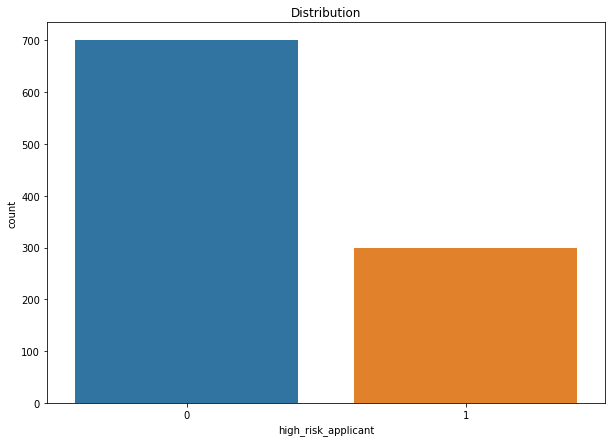

In [31]:
#plot to see the distribution among target categories
plt.figure(figsize=(10,7))
sns.countplot(x=df1['high_risk_applicant'])
plt.title('Distribution')
plt.show()

in this plot we can see we have less number of high risk applicant [1]

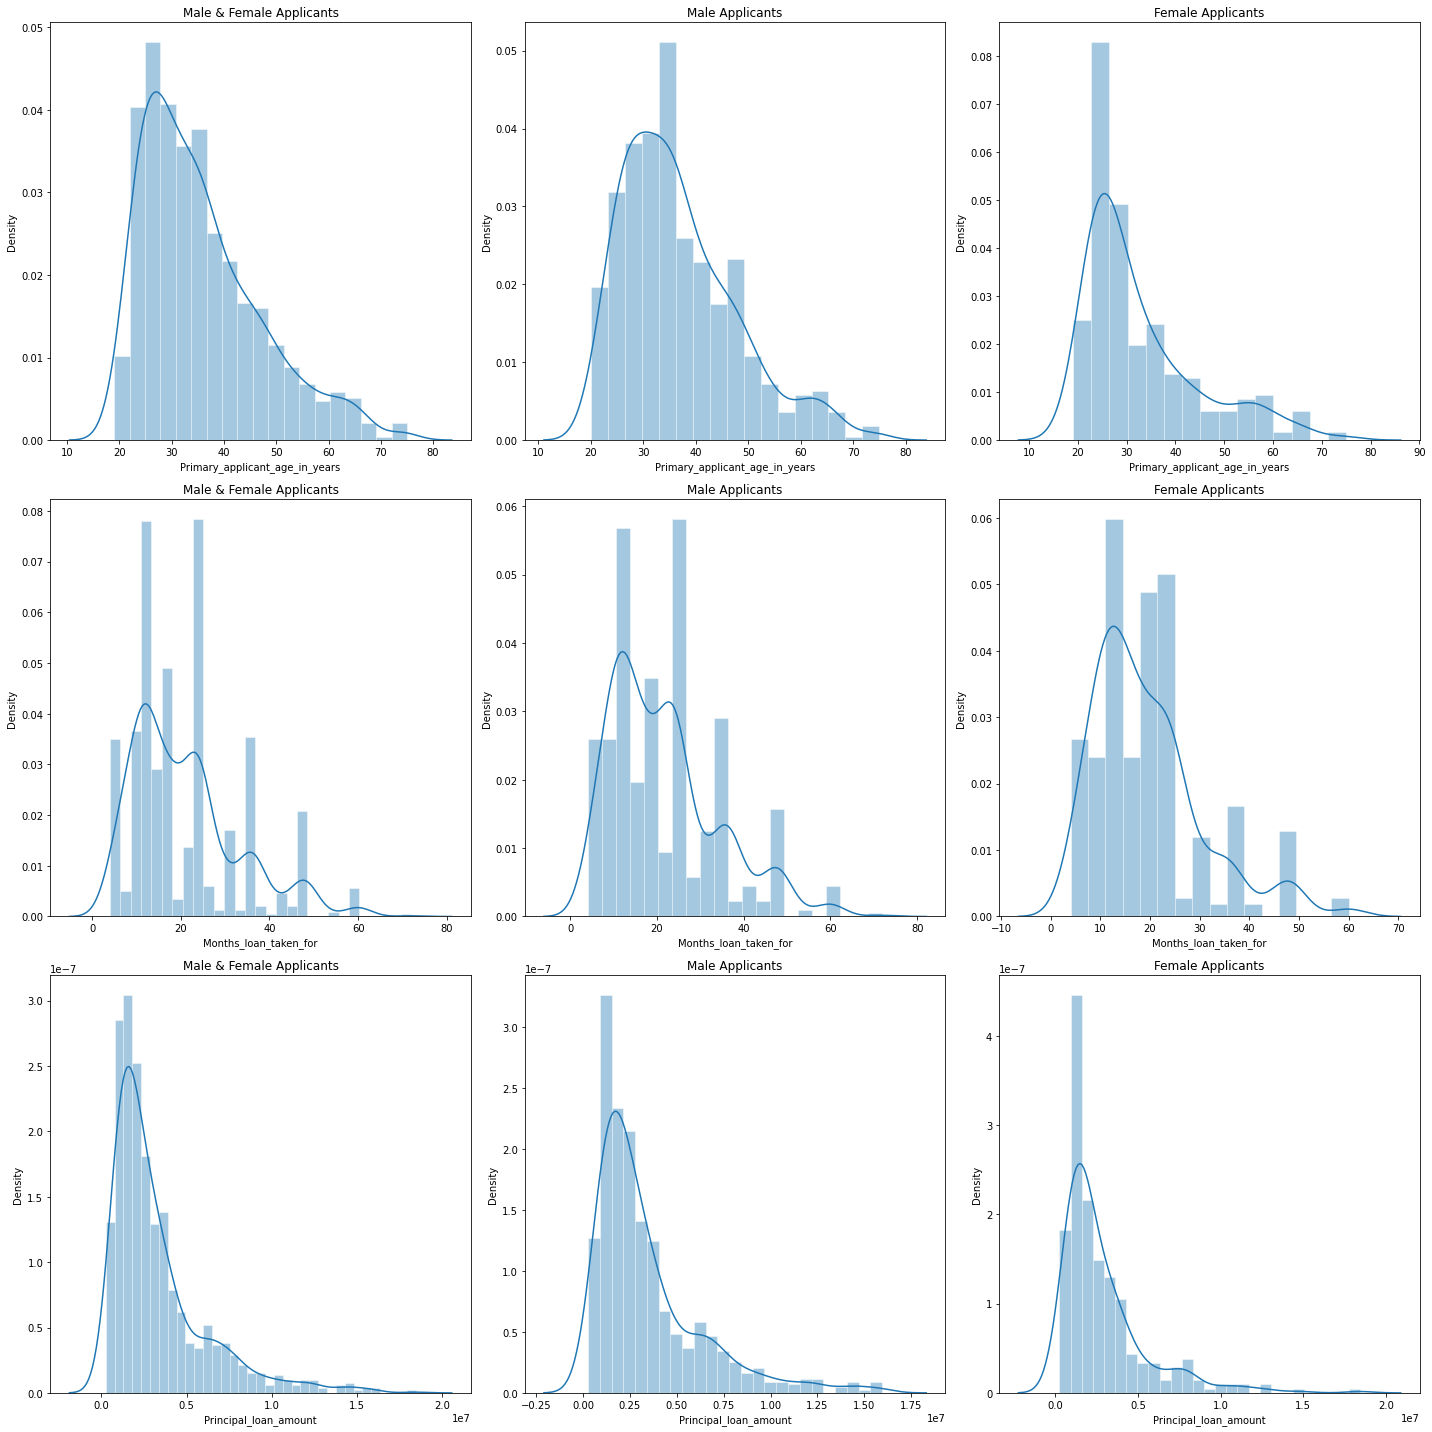

In [48]:
#distribution of numeric columns
plt.figure(figsize = (20,20))

for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+i+i+1)
    sns.distplot(df1[col],hist_kws = dict(linewidth = 1, edgecolor = 'w'))
    plt.title('Male & Female Applicants')
    #numeric column for male applicant
    plt.subplot(3,3,i+i+i+2)
    sns.distplot(df1[df1['Gender']=='male'][col],hist_kws = dict(linewidth = 1, edgecolor = 'w'))
    plt.title('Male Applicants')
    #numeric columns for female applicant
    plt.subplot(3,3,i+i+i+3)
    sns.distplot(df1[df1['Gender']=='female'][col],hist_kws = dict(linewidth = 1, edgecolor = 'w'))
    plt.title('Female Applicants')
    plt.tight_layout()
    
plt.show()


OBSERVATION 
1. male are between the age of 22 to 50
2. female are between the age of  20 to 35
3. loan for month are repeatedly like 12,24,36 month
4. overall the age of applicants are Younger

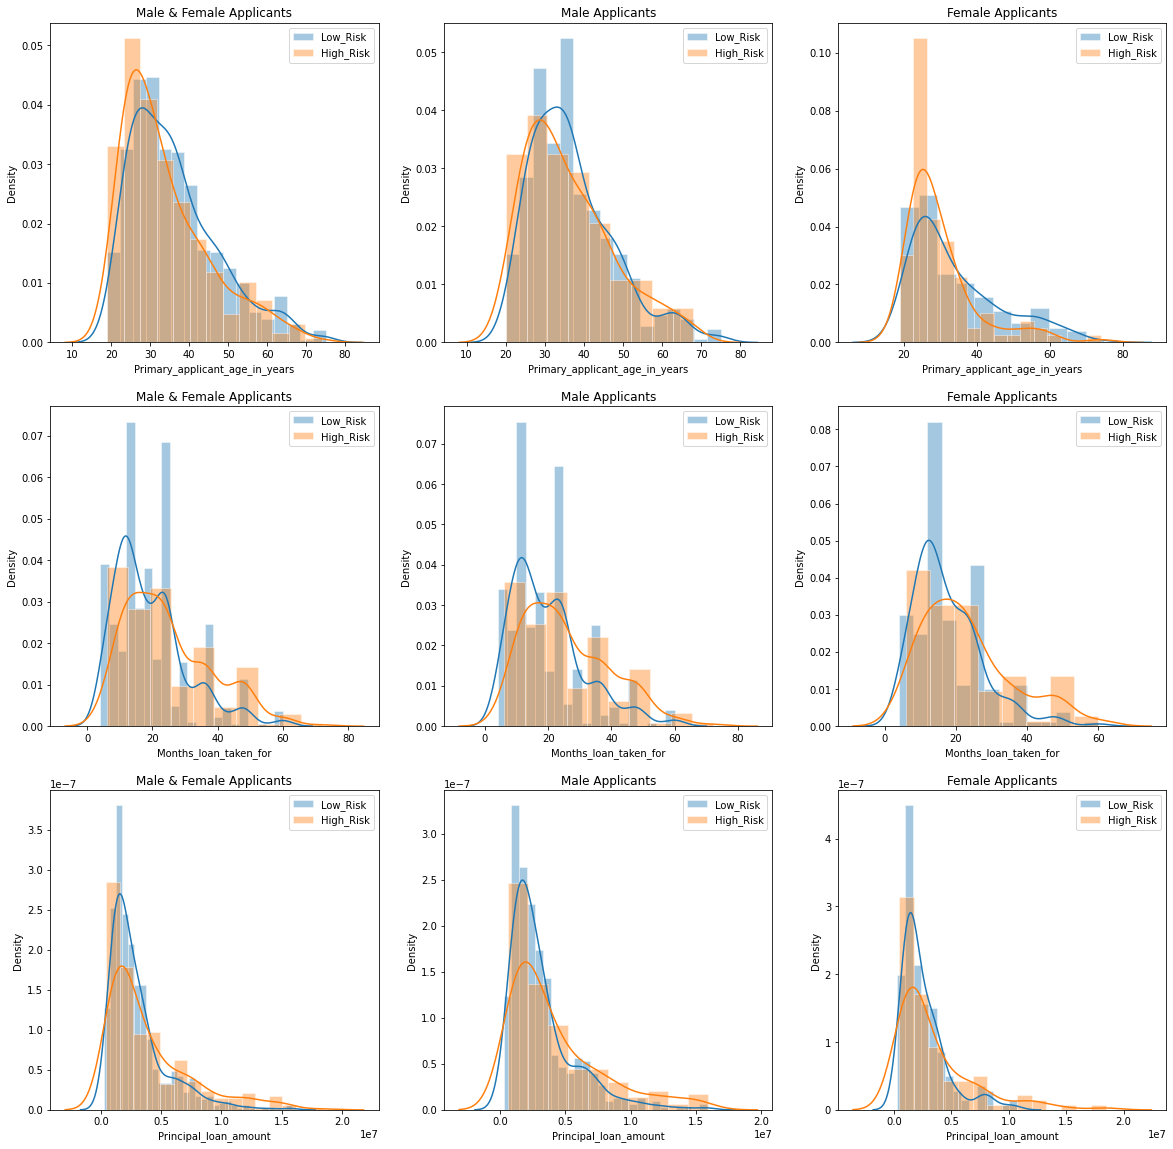

In [45]:
plt.figure(figsize = (20,20))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+i+i+1)
    sns.distplot(df1[df1['high_risk_applicant']==0][col],hist_kws = dict(linewidth = 1,edgecolor = 'w'),label = 'Low_Risk')
    sns.distplot(df1[df1['high_risk_applicant']==1][col],hist_kws = dict(linewidth = 1,edgecolor = 'w'),label = 'High_Risk')
    plt.title('Male & Female Applicants')
    plt.legend()
    
    
    plt.subplot(3,3,i+i+i+2)
    sns.distplot(df1[(df1['Gender']=='male') & (df1['high_risk_applicant']==0)][col],hist_kws = dict(linewidth = 1,edgecolor = 'w'),label = 'Low_Risk')
    sns.distplot(df1[(df1['Gender']=='male') & (df1['high_risk_applicant']==1)][col],hist_kws = dict(linewidth = 1,edgecolor = 'w'),label = 'High_Risk')
    plt.title('Male Applicants')
    plt.legend()
    
    
    plt.subplot(3,3,i+i+i+3)
    sns.distplot(df1[(df1['Gender']=='female') & (df1['high_risk_applicant']==0)][col],hist_kws = dict(linewidth = 1,edgecolor = 'w'),label = 'Low_Risk')
    sns.distplot(df1[(df1['Gender']=='female') & (df1['high_risk_applicant']==1)][col],hist_kws = dict(linewidth = 1,edgecolor = 'w'),label = 'High_Risk')
    plt.title('Female Applicants')
    plt.legend()
    
plt.show()
    

OBSERVATION 
1. Male are between age of 20 to 35 are part of high_risk
2. female are between age of 20 to 30 are high_risky
3. so the applicant between 20 to 35 are defaulters
4. those applicant are taking loan for months like 12,24,36 are defaluters they are high_risky
5. female applicants are taking less loan then the male 
6. applicants those are elders are low_risky


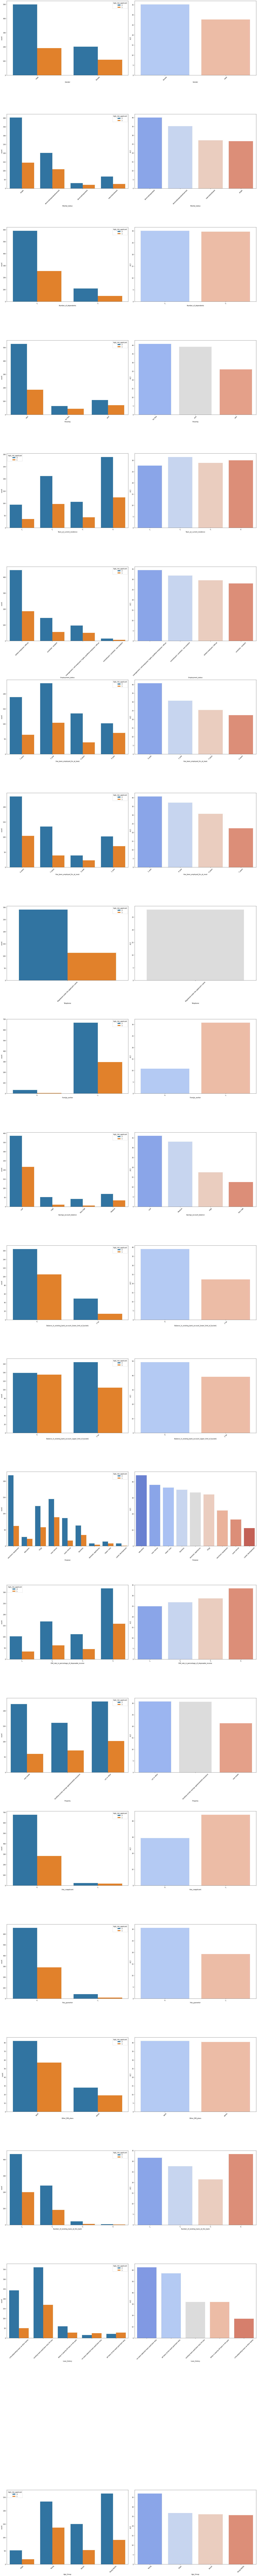

In [49]:
try:
    plt.figure(figsize=(25,250))
    for i, col in enumerate(cat_cols):
        if col != 'high_risk_applicant':
            data_pct = df1[[col,'high_risk_applicant']].groupby(col,as_index=False).mean().sort_values(by='high_risk_applicant',ascending=False)
            data_pct['PCT'] = data_pct['high_risk_applicant']*100
            
            plt.subplot(23,2,i+i+1)
            sns.countplot(data=df1, x=col,hue='high_risk_applicant')
            plt.xticks(rotation=45)
            
            plt.subplot(23,2,i+i+2)
            sns.barplot(data=data_pct,x=col,y='PCT',palette='coolwarm')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            
    plt.show()
except ValueError:
    pass
    

OBSERVATION:


1.Gender


a. we have 2x male applicant 

b. 35% female are defaulter than the male



2.Marital_status


a. majority of applicant are single

b. single applicant are less defaulters then others



3.No_of_dependents


a. in this both are same 



4.Housing


a. majourity of applicant are have own house 

b. own house applicants are less defaulters then others

c. for free housing applicants are having the large number of defaulters




5.year_of_current_residence


a. majority of applicant are residence of 4 and 2 year 




6.employement_status


a. majority of applicant are skilled employe official

b. skilled and unskilled are less defaulters




7.has_been_employed_for_at_least


a. majority of applicant are employed for 7 and 1 year
b. 7 and 1 year applicant are less defaulters




8.has_been_employed_for_at_most


a. defaulters percentage is higher at 1 year 

b. defaulters percentage is lesser at 7 year 


9.foreign_workers


a. data does not represent the correct defaulters percentage




10.saving_account_balance


a. majourity of data is showing the LOW balance applicants

b. data shows the low risk on the applicants those have low balance 




11.Balance_in_existing_bank_account(lower_limit_of_balance)


a. majority of applicant have less the 2 lac amount in bank
b. below 2 lac amount applicant are more defaulters





12.Balance_in_existing_bank_account(upper_limit_of_balance)


a. according to data many applicants are having 2 lac balance amount in the bank

b. below 2 lac balance applicants are defaulters 




13.purpose


a. large number of applicant are taking loan on ELECTRONIC EQUIPMENT , FF&E , NEW VEHICLES, USED VEHICLE

b. according to data EDUCATION ,NEW VEHICLE , REPAIR COSTS, BUSSINESS, DOMESTIC APPLIANCES are maximum DEFAULTERS

c. career development , used vehicle, electronic equipment are less defaulters




14.EMI_rate_in_percentage_disposable_income


a. according to data increment of emi rate of intrest is the reason for incresing the number of defaulters 




15.loan_history


a. many applicants are failed to pay the loan so they are in bank's existing_loan_paid_back_duly_till_now



16.Age_Group


a. majority of young age applicant are higher defaulters age between 18 to 29

In [54]:
#gender vs purpose
df1['Purpose'].unique()
sex_purpose = pd.crosstab(df1['Purpose'], df1['Gender']).apply(lambda x: x/x.sum()*100)
sex_purpose

Gender,female,male
Purpose,,
FF&E,24.104235,15.712188
business,6.188925,11.453744
career development,0.977199,0.881057
domestic appliances,1.954397,0.881057
education,6.840391,4.258443
electronic equipment,27.687296,28.634361
new vehicle,22.801303,24.082232
repair costs,1.628664,2.496329
used vehicle,7.817590,11.600587


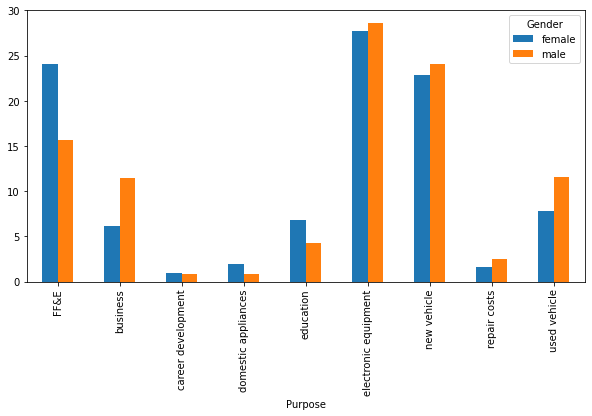

In [53]:
sex_purpose.plot(kind='bar',figsize=(10,5));

OBSERVATION





a. mostly female & male are taking loan on electronic equipment, new vehicle, FF&E


In [55]:
#percent distribution of gender 
employment_status = pd.crosstab(df['Employment_status'],df['Gender']).apply(lambda x:x/x.sum()*100)
employment_status

Gender,female,male
Employment_status,,
management / self-employed / highly qualified employee / officer,11.935484,16.086957
skilled employee / official,63.548387,62.753623
unemployed / unskilled - non-resident,3.870968,1.449275
unskilled - resident,20.645161,19.710145


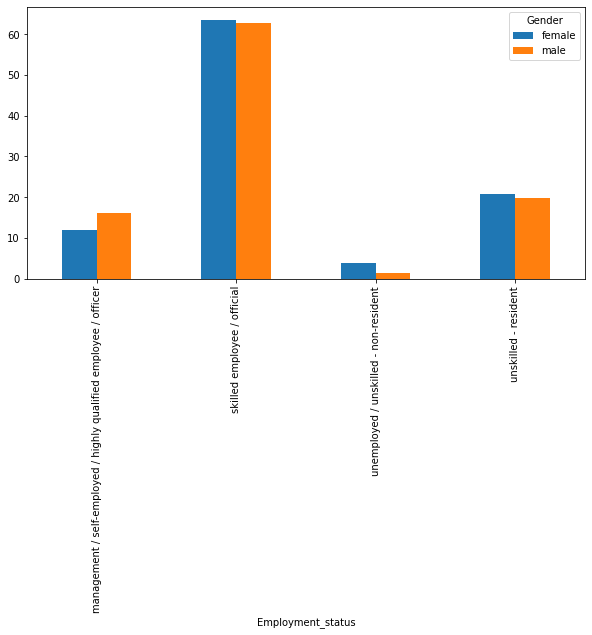

In [56]:
employment_status.plot(kind='bar',figsize=(10,5));

OBSERVATION 


a. majority Male and Female are skilled employee official

In [57]:
#age_group vs purpose

df1['Purpose'].unique()
age_group_purpose = pd.crosstab(df1['Purpose'],df1['Age_Group']).apply(lambda x:x/x.sum()*100)
age_group_purpose

Age_Group,Elder,Senior,Young,Young Adults
Purpose,,,,
FF&E,4.347826,17.910448,22.826087,16.571429
business,13.043478,6.467662,9.782609,11.142857
career development,0.000000,0.497512,0.543478,1.714286
domestic appliances,1.449275,0.995025,1.902174,0.571429
education,8.695652,6.467662,3.260870,5.428571
electronic equipment,27.536232,25.373134,31.793478,26.571429
new vehicle,27.536232,26.865672,19.293478,25.714286
repair costs,4.347826,2.985075,2.173913,1.428571
used vehicle,13.043478,12.437811,8.423913,10.857143


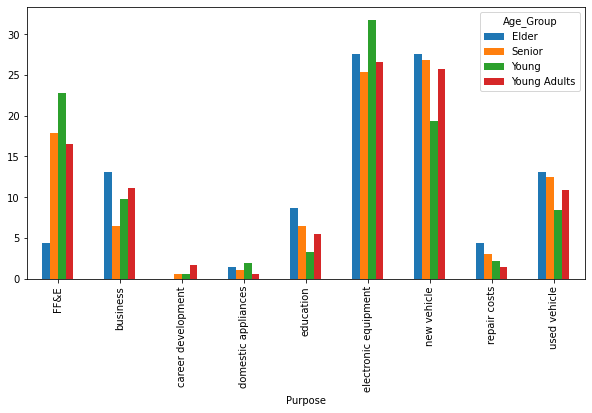

In [58]:
age_group_purpose.plot(kind='bar',figsize=(10,5));

OBSERVATION


a. majority of data shows thats young ,young_adult, elder and senior are taking loan in ELECTRONIC EQUIPMENT , NEW VEHICLE, FF&E , BUSSINES

CONCLUSION

HIGH CREDIT RISK APPLICANTS CHARACTERSTICS

a. mostly female are defaulters


b. young age group 18 to 29


c. taking loan over for 24 months


d. fail to paid the loan amount


e. mostly live on free or rent


f. most of the skilled employee official


g. low balance amount in bank


h. taking loan in ELECTRONIC EQUIPMENT , NEW VEHICLE, FF&E , BUSSINES